### Visualizing data in order to identify weak aeas to make more profits.

#### The goal is to derive business problems by exploring this data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('data/SampleSuperstore.csv')

In [2]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
data.shape

(9994, 13)

In [16]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Let's check the unique values on some of the columns in order to get some insights of the dataset.  

In [4]:
print(data.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [5]:
# for a in data.columns:
#     print("data[{a}]={data[a].nunique()}".format(a, data[a].nunique()))

# #low_cardinality_cols = [cname for cname in train_X.columns if train_X[cname].nunique() < 10 and 
# # 43                         train_X[cname].dtype == "object"]


data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
data['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

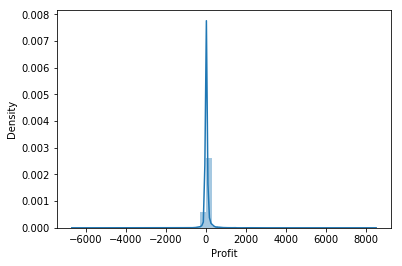

In [7]:
sns.distplot(data['Profit'])

In [8]:
col=['Postal Code']
df=data.drop(columns=col,axis=1)

In [12]:
# var = 'Sales'
# data = pd.concat([data['Profit'], data[var]], axis=1)
# data.plot.scatter(x=var, y='Profit', ylim=(0,800000));
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


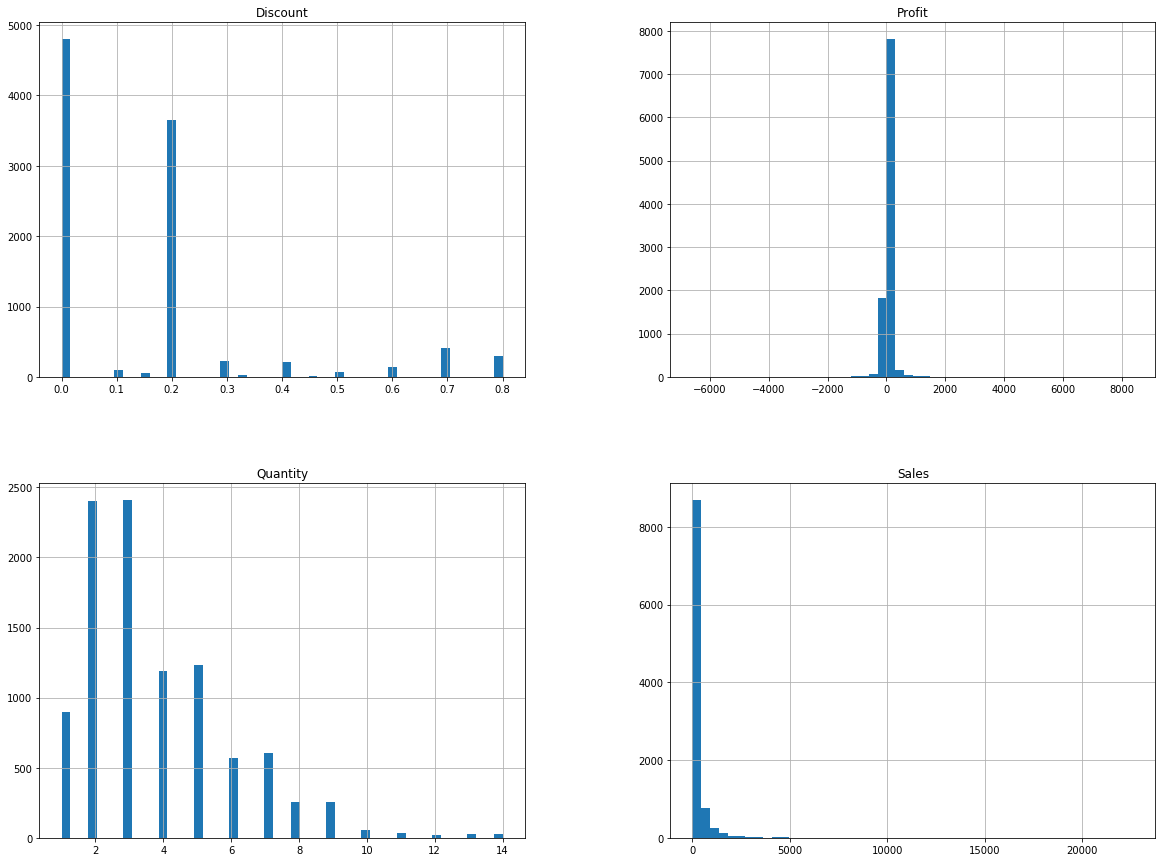

In [13]:
df.hist(bins=50 ,figsize=(20,15))
plt.show()

In [17]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

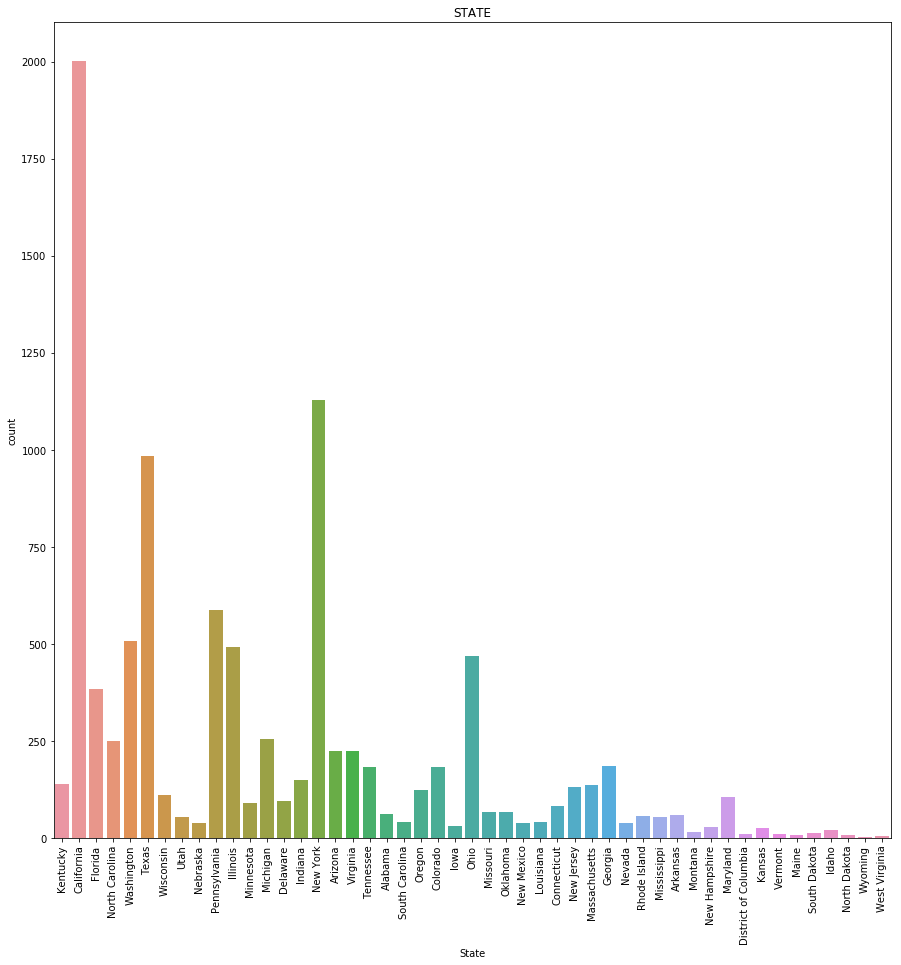

In [20]:
plt.figure(figsize=(15,15))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

In [22]:
from plotnine import *

Profit_plot = (ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

ModuleNotFoundError: No module named 'plotnine'

<function matplotlib.pyplot.show(*args, **kw)>

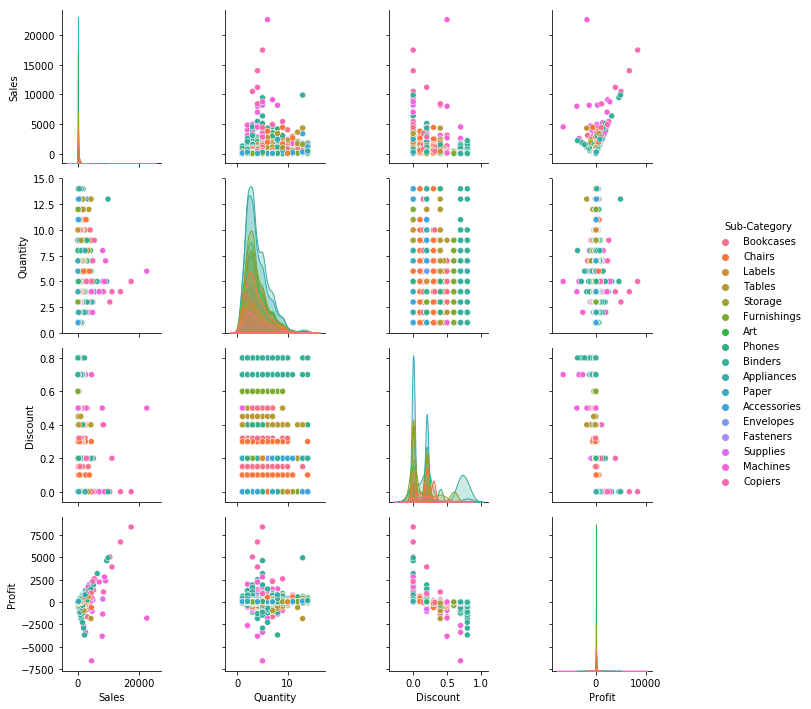

In [24]:
figsize=(15,10)
sns.pairplot(df,hue='Sub-Category')
plt.show

In [26]:
# gives us a range that represents each row of the data frame
df.index

RangeIndex(start=0, stop=9994, step=1)

In [28]:
df.groupby('Segment').mean()

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,223.733644,3.760547,0.158141,25.836873
Corporate,233.823300,3.843709,0.158228,30.456667
Home Office,240.972041,3.782389,0.147128,33.818664


In [36]:
# # Extract data by region
south = df[df['Region'] == 'South']
west = df[df['Region'] == 'West']
#df.groupby('Region').first()

In [ ]:
## Plot profit by region : 4 different plot 